In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random


# cargamos los datos
data = pd.read_csv('Dataset_multivariable.csv')

# hacemos shuffle de los datos
data = data.sample(frac=1, random_state=0)

# dividimos los datos en entrenamiento 0.8 y test 0.2
train_data = data.iloc[:int(len(data)*0.8)]
test_data = data.iloc[int(len(data)*0.8):]

print('tr:', train_data)
print('ts:', test_data)

tr:     x1   x2    x3    x4    x5     y
2  1.0  0.8 -18.0  20.0  13.6  17.4
8  1.0  2.0 -36.0  44.0  23.8  34.8
4  1.0  1.2 -24.0  28.0  17.0  23.2
9  1.0  2.2 -39.0  48.0  25.5  37.7
1  1.0  0.6 -15.0  16.0  11.9  14.5
6  1.0  1.6 -30.0  36.0  20.4  29.0
7  1.0  1.8 -33.0  40.0  22.1  31.9
3  1.0  1.0 -21.0  24.0  15.3  20.3
ts:     x1   x2    x3    x4    x5     y
0  1.0  0.4 -12.0  12.0  10.2  11.6
5  1.0  1.4 -27.0  32.0  18.7  26.1


In [27]:
numero_variables = train_data.shape[1] - 1
w = np.zeros(numero_variables)
alpha = 0.000006
y = lambda x: np.dot(w, x)
y_pred = [] # predicciones
error = [] # errores
ws = [] # pesos

# entrenamiento
for i in range(5):
  # calculamos los pesos
  for column in range(numero_variables):
    w[column] = w[column] - 2*alpha * np.dot(w[column]*train_data.iloc[:, column] - train_data.iloc[:, numero_variables], train_data.iloc[:, column])
  ws.append(w.copy())
  # calculamos una predicción
  y_pred.append(y(test_data.iloc[:, :numero_variables].T.values))
  # calculamos el error
  error.append(np.sum(abs(y_pred[-1] - test_data.iloc[:, numero_variables])))

# pintamos los pesos
print(*ws, end='\n\n', sep='\n')

# pintamos las predicciones
print(*y_pred, end='\n\n', sep='\n')

# pintamos los errores
print(*error, end='\n\n', sep='\n')

[ 0.0025056   0.00392544 -0.0739152   0.0885312   0.05040432]
[ 0.00501096  0.00785003 -0.14217855  0.16733955  0.09901167]
[ 0.00751608  0.01177377 -0.20522221  0.23749285  0.14588612]
[ 0.01002096  0.01569665 -0.2634453   0.29994164  0.19108945]
[ 0.01252559  0.01961869 -0.31721642  0.35553205  0.23468123]

[2.46755664 5.7792708 ]
[ 4.73228721 11.06120568]
[ 6.81284476 15.89284071]
[ 8.72605522 20.31652439]
[10.4871032  24.37039953]

29.453172560000002
21.906507108499277
14.99431453604156
8.657420385374923
2.8424972749066715



Ploteamos los resultados

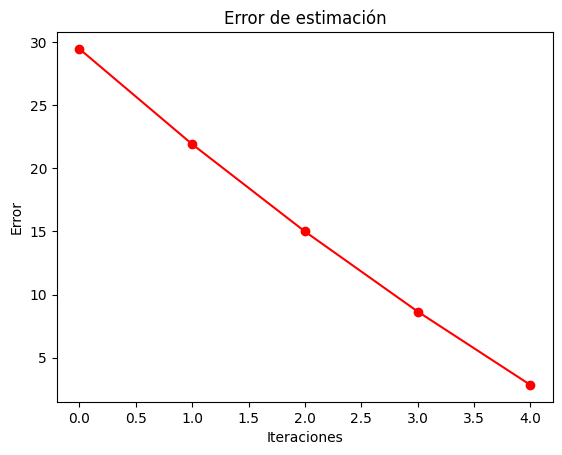

In [28]:
# graficamos el error de estimación
plt.plot(range(len(error)), error, 'o-', c='r')
plt.xlabel('Iteraciones')
plt.ylabel('Error')
plt.title('Error de estimación')
plt.show()